<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/05_svm_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Linear Classifiers

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Object
Use Support Vector Machines (SVM) for linear classification

## Load Data

In this notebook, I'll use the scikit learn iris dataset to demonstrate linear classification. Let's load the required libraries and also the iris dataset.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
iris = load_iris(as_frame=True)
type(iris)

sklearn.utils._bunch.Bunch

__Bunch__ is a special datatype contains multiple pandas dataframes. Let's inspect the dataframes inside `iris`.

## Inspect Data

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


The `data` dataframe contains four features as shown in the table above. There are a total of 150 samples with no _null_ value. For simplycity and to be able to visualize it easily, I only use two features, _petal length_ and _petal width_.<br>

Let's check the `target` dataseries.

In [ ]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

It seems `iris.target` has also a total of 150 entries. There are three classes in the dataseries, 0, 1, and 2 which are corresponding to 'setosa', 'versicolor', and 'virginica'.

- 0 -> setosa
- 1 -> versicolor
- 2 -> virginica

For this exercise, we are only interested in 'virginica' type, we create a new target series with binary classes. <br>

## Create training set

In [ ]:
# Creat feature and target sets
X = iris.data[['petal length (cm)', 'petal width (cm)']].values # converts pandas.DataFram to numpy.ndarray
y = (iris.target == 2) # only interested in 'virginica' which corresponds to label '2' in the 'target' dataseries

In [ ]:
print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (150, 2)
<class 'pandas.core.series.Series'> (150,)


Let's plot the dataset to get a better sense.

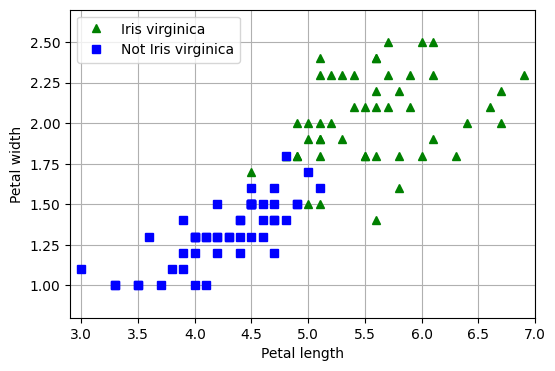

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
plt.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

It seems a linear classifier can be used in this case.

## LinearSVC
We use `LinearSVC` classifier from sklearn library. We create two model here, each with diferent hyperparameter `C`, which is a parameter that regularize the model. The higher the `C`, the narrower are the margins (__hard margin classification__) and the higher the chance of overfitting. Reducing the `C` moves the margins farther from each other (__soft margin classification__) and increases the chance of underfitting.

In [ ]:
# Soft margin classifier
svm_clf_C1 = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42), # C is a regularization phyperparameter. C=1 creates boundary with wider bandwidth, more margin violation, and higher chance of underfitting.
)

# Hard margin classifier
svm_clf_C100 = make_pipeline(
    StandardScaler(),
    LinearSVC(C=100, random_state=42), # C is a regularization phyperparameter. C=100 creates boundary with narrower bandwidth, less margin violation, and higher chance of overfitting.
)

Let's train the models.

In [ ]:
svm_clf_C1.fit(X, y)
svm_clf_C100.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=100, random_state=42))])

Use the models to make a prediction on two new examples is as follows. `.predict` returns the classes that they belog to, and `.decision_function` tells us how far are these examples (scores) from the decision boundary. If the example is above the boundary, its score would be positive and vice versa.

In [ ]:
X_new = [[5.5, 1.7], [5.0, 1.5]]

print(svm_clf_C1.predict(X_new))
print(svm_clf_C1.decision_function(X_new), end="\n\n")

print(svm_clf_C100.predict(X_new))
print(svm_clf_C100.decision_function(X_new))

[ True False]
[ 0.66163411 -0.22036063]

[ True False]
[ 1.2726318  -0.23024015]


The coefficient and intercept of the decision boundaries are as follows.

In [ ]:
clf_C1 = svm_clf_C1.named_steps['linearsvc'] # access classifier in the pipeline via its name
clf_C100 = svm_clf_C100.named_steps['linearsvc']

print(f"svm_clf_C1: scaled coefficients (w): {clf_C1.coef_[0]}, scaled intercept (b): {clf_C1.intercept_[0]}")
print(f"svm_clf_C100: scaled coefficients (w): {clf_C100.coef_[0]}, scaled intercept (b): {clf_C100.intercept_[0]}")

svm_clf_C1: scaled coefficients (w): [1.52204565 1.70721527], scaled intercept (b): -1.9704759578221047
svm_clf_C100: scaled coefficients (w): [3.07495369 2.38927006], scaled intercept (b): -3.346525261972264


The coefficient and intercept of the boundaries are scaled, because I used `StandardScaler` to scale the features. Here are the scale factors.

In [ ]:
scaler = svm_clf_C1.named_steps['standardscaler'] # access scaler in the pipeline via its name

print(f"scaler scale: {scaler.scale_}")
print(f"scaler mean: {scaler.mean_}")

scaler scale: [1.75940407 0.75969263]
scaler mean: [3.758      1.19933333]


The __scale__ and is the standard deviation of each featur. The scale factors for both models are the same as their means and standard deviations are the same. To be able to plot the decision boundary we need to compute the unscaled coefficient and intercept of the decision boundaries. Here is how. <br>

$ y = w X + b \tag{1}$<br>
$ y_s = w_s X_s + b_s \tag{2}$ <br>


where subscript $s$ indicates the scaled parameters and <br>

$ X_s = \cfrac{X - \mu}{\sigma} \tag{3}$ <br>

where $\mu$ and $\sigma$ are mean and standard deviation of $X$ respectively. Our goal is find $w$ and $b$ in terms of $w_s$ and $b_s$. Substituting $X_s$ in $(2)$ with the one in $(3)$ will result in <br>

$ y_s = w_s (\frac{X-\mu}{\sigma}) + b_s \tag{4}$ <br>
<br>
$ y_s = (\frac{w_s}{\sigma}) X + \left[w_s (-\frac{\mu}{\sigma}) + b \right] \tag{5}$ <br>

Comparing $(5)$ with $(1)$, we can conclude that unscaled cofficient is<br>

$ w_s = \cfrac{w_s}{\sigma} \tag{6} $ <br>

To compute unscaled intercept, we need to evaluate the decision function at the point where the scaled features are zero. This point for each feature is $-\frac{\mu}{\sigma}$.<br>
To evaluate the decision boundary at this point, we use  `.decision_function()` with $-\frac{\mu}{\sigma}$ as its input. This returns the intercept in the unscaled fearture space.

In [ ]:
# Compute unscaled parameters for 'svm_clf_C1'
print(f"unscaled coefficients (w): {clf_C1.coef_ / scaler.scale_}")
print(f"unscaled intercept (b): {clf_C1.decision_function([-scaler.mean_ / scaler.scale_])}")

unscaled coefficients (w): [[0.86509158 2.24724474]]
unscaled intercept (b): [-7.91668565]


__Note:__ Above, I used `clf_C1.decision_function()` which uses unscaled input argument. If instead I use `svm_clf_C1.decision_function()` which scale the input argument first (because it passes it through the whole pipeline), I would get a different result which would obviously be incorrect.

To obtain the decision boundary, I set the decision function to zero, because all the points on this line have a distance (score) of zero from this line.

$ y = w X + b = 0 \tag{9}$
$ w_0 x_0 + w_1 x_1 + b = 0 \tag{10} $
$ x_1 = \left( - \frac{w_0}{w_1} \right) x_0 - \frac{b}{w_1} \tag{11} $

where $x_0$ is the petal length and $x_1$ is the petal width.<br>
Now, I am ready to define some helper functions and then plot the dataset along with classifiers.

### Plot Classifiers

In [ ]:
def get_unscaled_params(svm_clf):
    scaler = svm_clf.named_steps['standardscaler']
    classifier= svm_clf.steps[1][1] # another way to access classifier is to use .steps with indices

    # Scaled coefficients and intercept
    w_s = classifier.coef_[0]
    b_s = classifier.intercept_[0]

    # Unscaled coefficients and intercept
    w = w_s / scaler.scale_
    b = classifier.decision_function([-scaler.mean_ / scaler.scale_])

    return w, b

In [ ]:
def plot_svc_decision_boundary(ax, svm_clf):
    # Unscaled coefficients and intercept
    w, b = get_unscaled_params(svm_clf)

    # Generate unscaled x0 and x1 for plotting
    xmin = X[:, 0].min() - 0.2
    xmax = X[:, 0].max() + 0.2
    x0 = np.linspace(xmin, xmax, 200)
    x1 = -(w[0] / w[1]) * x0 - b / w[1]

    ax.plot(x0, x1, "k-", linewidth=2, zorder=-2)

In [ ]:
def decorate(ax, title):
    ax.set_title(title)
    ax.set_xlabel("Petal length", fontsize=10)
    ax.set_ylabel("Petal width", fontsize=10)
    ax.legend(loc="upper left", fontsize=10)
    ax.set_xlim(2.9, 7)
    ax.set_ylim(.8, 2.7)
    ax.grid()

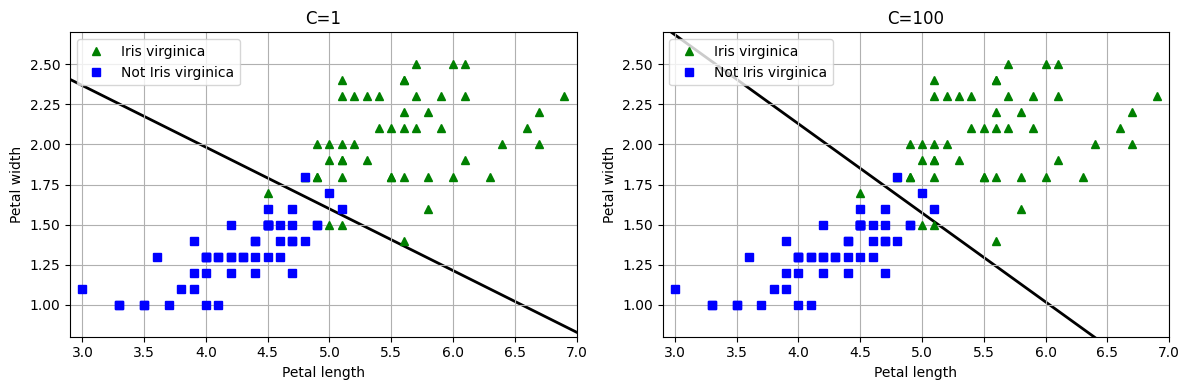

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 row, 2 columns

# Plot on the left subplot (svm_clf1 with C=1)
ax1.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
ax1.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(ax1, svm_clf_C1)
decorate(ax1, title="C=1")

# Plot on the second subplot
ax2.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
ax2.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(ax2, svm_clf_C100)
decorate(ax2, title="C=100")

plt.tight_layout()
plt.show()


# In NumPy, the ~ operator performs a bitwise NOT operation on the elements of an array.
# This operator inverts each bit of the array's integer or boolean elements.
# For integer arrays, it flips each bit (turns 0s into 1s and 1s into 0s).
# For boolean arrays, it changes True to False and False to True.
# The bitwise NOT of an integer x is -x-1. So, ~1 is -2, ~2 is -3, and ~3 is -4.

I should define a couple of other helper method if I want to add the mergins and support vectors to the plot.

In [ ]:
def get_support_vectors(svm_clf, X, y):
    # Unscaled coefficients and intercept
    w, b = get_unscaled_params(svm_clf)

    # Compute decision function for each sample X
    decision_boundary = X.dot(w) + b

    # Convert binary class labels 'y' from {0, 1} to {-1, 1}
    # SVM formulation typically uses labels {-1, 1}
    t = y * 2 - 1

    # Identify support vector indices for classifier
    # 't * decision_boundary' scales the decision boundary by the corresponding label in 't'
    # '<1' condition checks which samples are within the margin or on the wrong side of the decision boundary
    support_vector_indices = (t * decision_boundary < 1).ravel()

    # Get support vectors
    support_vectors = X[support_vector_indices]

    return support_vectors

In [ ]:
def plot_svc_decision_boundary_with_margins(ax, svm_clf, X, y):
    # Unscaled coefficients and intercept
    w, b = get_unscaled_params(svm_clf)

    # Generate unscaled x0 and x1 for plotting
    xmin = X[:, 0].min() - 0.2
    xmax = X[:, 0].max() + 0.2
    x0 = np.linspace(xmin, xmax, 200)
    x1 = -(w[0] / w[1]) * x0 - b / w[1]

    # Generate margins
    margin = 1 / w[1]
    gutter_up = x1 + margin
    gutter_down = x1 - margin

    # Support vectors
    try :
        svs = svm_clf.steps[1][1].support_vectors_ # if SVC with kernel='linear is used
        svs = svm_clf.named_steps['standardscaler'].inverse_transform(svs) # unscaled support vectors
    except AttributeError:
        svs = get_support_vectors(svm_clf, X, y) # if LinearSVC is used

    ax.plot(x0, x1, "k-", linewidth=2, zorder=-2)
    ax.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    ax.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFBB00')

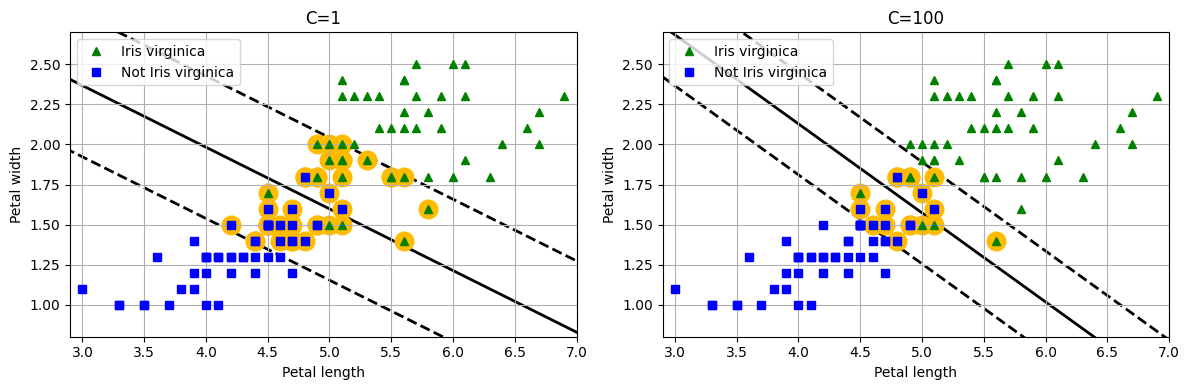

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 row, 2 columns

# Plot on the left subplot (svm_clf1 with C=1)
ax1.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
ax1.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plot_svc_decision_boundary_with_margins(ax1, svm_clf_C1, X, y)
decorate(ax1, title="C=1")

# Plot on the second subplot
ax2.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
ax2.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plot_svc_decision_boundary_with_margins(ax2, svm_clf_C100, X, y)
decorate(ax2, title="C=100")

plt.tight_layout()
plt.show()

## SVC Classifer with Linear Kernel
Now, let's use `SVC` with `kernel='linear'` instead of `LinearSVC` as the classifier. This way we don't need to compute the support vectors manually.

In [ ]:
# SVC classifier instead of LinearSVC
svm_clf_C1_kernel = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", C=1, random_state=42),
)

svm_clf_C100_kernel = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", C=100, random_state=42),
)

# Train models
svm_clf_C1_kernel.fit(X, y)
svm_clf_C100_kernel.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, kernel='linear', random_state=42))])

In [ ]:
print(f"svm_clf_C1 coefficients: {svm_clf_C1.named_steps['linearsvc'].coef_}, intercept: {svm_clf_C1.named_steps['linearsvc'].intercept_}")
print(f"svm_clf_C1_kernel coefficients: {svm_clf_C1_kernel.named_steps['svc'].coef_}, intercept: {svm_clf_C1_kernel.named_steps['svc'].intercept_}", end="\n\n")

print(f"svm_clf_C1 coefficients: {svm_clf_C100.named_steps['linearsvc'].coef_}, intercept: {svm_clf_C100.named_steps['linearsvc'].intercept_}")
print(f"svm_clf_C100_kernel coefficients: {svm_clf_C100_kernel.named_steps['svc'].coef_}, intercept: {svm_clf_C100_kernel.named_steps['svc'].intercept_}")

svm_clf_C1 coefficients: [[1.52204565 1.70721527]], intercept: [-1.97047596]
svm_clf_C1_kernel coefficients: [[2.09352075 2.44252199]], intercept: [-2.84959514]

svm_clf_C1 coefficients: [[3.07495369 2.38927006]], intercept: [-3.34652526]
svm_clf_C100_kernel coefficients: [[7.0311613  6.06503125]], intercept: [-7.96358483]


Comparing the coefficients and intercepts of the models obtained with `LinearSVC` and `SVC(kernel='linear')`, shows that the model paarameters are not the same. Let's plot the models with `SVC(kernel='linear')`.

### Plot Classifiers

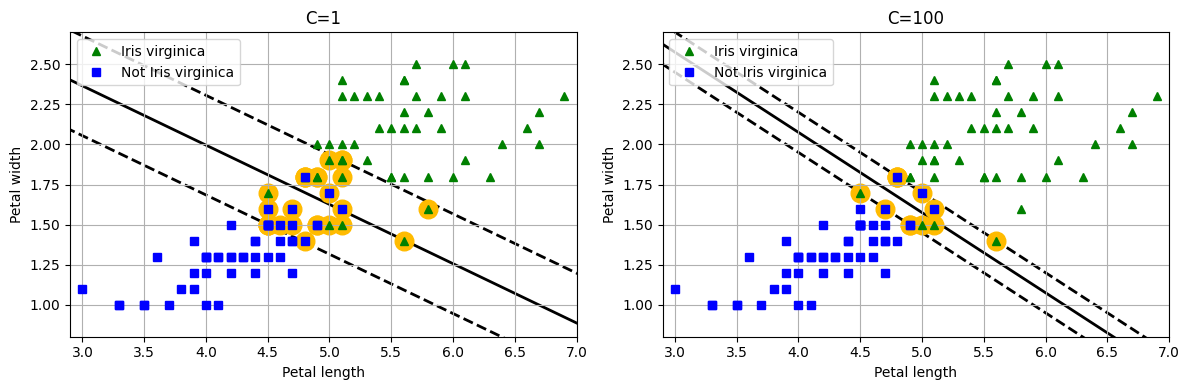

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 row, 2 columns

# Plot on the left subplot (svm_clf1 with C=1)
ax1.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
ax1.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plot_svc_decision_boundary_with_margins(ax1, svm_clf_C1_kernel, X, y)
decorate(ax1, title="C=1")

# Plot on the second subplot
ax2.plot(X[:, 0][y], X[:, 1][y], "g^", label="Iris virginica")
ax2.plot(X[:, 0][~y], X[:, 1][~y], "bs", label="Not Iris virginica")
plot_svc_decision_boundary_with_margins(ax2, svm_clf_C100_kernel, X, y)
decorate(ax2, title="C=100")

plt.tight_layout()
plt.show()

The polts show that the models trained with `SVC(kernel='linear')` have narrower margins compared to those trained with `LinearSVC` with similar hyperparameter `C`.